# Question 4: Creating Figure 1

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection



In [5]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")

In [6]:
# compute the month average temperature from 2002 to 2012
avgTemperature2002_2012 = ds.analysed_sst.sel(lat=slice(33, 48), lon=slice(-132, -118), time=slice('2002', '2012')).groupby('time.month').mean(dim='time')

In [7]:
# compute the month average temperature from 2014 to 2016 and put them into an array
month_temperatures = []
for year in range(2014, 2017):
    for month in range(1, 13):
        month_temperatures.append(ds.analysed_sst.sel(lat=slice(33, 48), lon=slice(-132, -118), time=f'{year}-{month}').mean(dim='time'))

In [8]:
# compute the bias between a specific month and the average
delta = []
for i in range(36):
    delta.append(month_temperatures[i] - avgTemperature2002_2012[i % 12, :, ])

In [ ]:
fig = plt.figure(figsize=(12, 1))


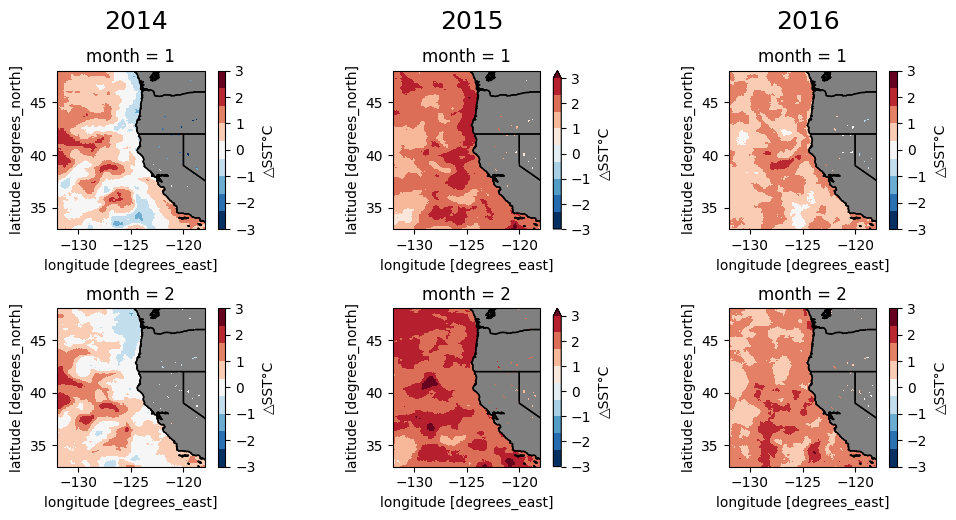

In [21]:
# plot

fig = plt.figure(figsize=(12, 36))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for j in range(1, 4):
    for i in range(2):
        ticks = [-3, -2, -1, 0, 1, 2, 3]
        levels = np.linspace(-3, 3, 10)
        # choose the right figure
        data = delta[12*(j-1)+i]
        ax = plt.subplot(12, 3, 3*i+j, projection=crs)
        # show axis
        ax.axes.get_xaxis().set_visible(True)
        ax.axes.get_yaxis().set_visible(True)
        # plot
        data.plot(ax=ax, transform=crs, levels=levels, cbar_kwargs={'ticks': ticks, 'label': '△SST°C', 'location': 'right'})
        if i == 0:
            plt.text(-127.5, 52, f'{2013+j}', fontdict={'fontsize': 18})
        ax.add_feature(cfeature.LAND, color="grey")
        ax.add_feature(cfeature.STATES.with_scale("10m"))
        ax.coastlines("10m", color="k")

plt.show()